# Lending club case study

### problem staetement will be documented here


In [1]:
#importing libraries and data
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
data=pd.read_csv('loan.csv')

C:\Program Files\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2717: DtypeWarning: Columns (47) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


## Data Understanding

In [2]:
#glace at data

print(data.shape)
data.head()

(39717, 111)


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [3]:
#chekcing data columns and info
print(data.columns)
print(data.info())
print("loan status tells us loan is defaulted or not-------",data.loan_status.unique())


Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       ...
       'num_tl_90g_dpd_24m', 'num_tl_op_past_12m', 'pct_tl_nvr_dlq',
       'percent_bc_gt_75', 'pub_rec_bankruptcies', 'tax_liens',
       'tot_hi_cred_lim', 'total_bal_ex_mort', 'total_bc_limit',
       'total_il_high_credit_limit'],
      dtype='object', length=111)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB
None
loan status tells us loan is defaulted or not------- ['Fully Paid' 'Charged Off' 'Current']


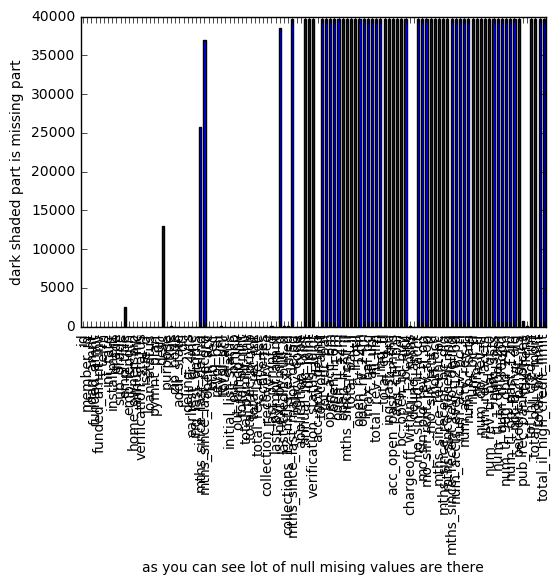

In [4]:
data.isnull().sum().plot(kind='bar')
plt.xlabel("as you can see lot of null mising values are there")
plt.ylabel("dark shaded part is missing part")
plt.show()

#### After examining loan_status column tells us 

# Basic cleaning

In [5]:
# removing columns where every entry is null

allnullcols=data.columns[pd.isnull(data).all(axis=0)].tolist()
data=data.drop(allnullcols,axis=1)
print("data shape after removing null columns",data.shape)

data shape after removing null columns (39717, 57)


In [6]:
# columns where unique value is one means no much data in them to consider

uniq1=[]
cols=data.columns.tolist()
for i in cols:
    if len(data[i].unique())==1:
        uniq1.append(i)
        
uniq1

['pymnt_plan',
 'initial_list_status',
 'policy_code',
 'application_type',
 'acc_now_delinq',
 'delinq_amnt']

In [7]:
#dropping columns where only one unique value is present

data=data.drop(uniq1,axis=1)

In [8]:
#percentage of missing values column wise.
(data.isnull().sum()/data.shape[0])*100

id                             0.000000
member_id                      0.000000
loan_amnt                      0.000000
funded_amnt                    0.000000
funded_amnt_inv                0.000000
term                           0.000000
int_rate                       0.000000
installment                    0.000000
grade                          0.000000
sub_grade                      0.000000
emp_title                      6.188786
emp_length                     0.000000
home_ownership                 0.000000
annual_inc                     0.000000
verification_status            0.000000
issue_d                        0.000000
loan_status                    0.000000
url                            0.000000
desc                          32.577989
purpose                        0.000000
title                          0.025178
zip_code                       0.000000
addr_state                     0.000000
dti                            0.000000
delinq_2yrs                    0.000000


In [9]:
#columns where missing values are more than 50%

missing50=data.columns[(data.isnull().sum()/data.shape[0])*100 > 50].tolist()
print(missing50)

['mths_since_last_delinq', 'mths_since_last_record', 'next_pymnt_d']


In [10]:
#dropping columns where values are missing more than 90%

data=data.drop(missing50,axis=1)

In [11]:
#percentage of missing values column wise.

(data.isnull().sum()/data.shape[0])*100

id                             0.000000
member_id                      0.000000
loan_amnt                      0.000000
funded_amnt                    0.000000
funded_amnt_inv                0.000000
term                           0.000000
int_rate                       0.000000
installment                    0.000000
grade                          0.000000
sub_grade                      0.000000
emp_title                      6.188786
emp_length                     0.000000
home_ownership                 0.000000
annual_inc                     0.000000
verification_status            0.000000
issue_d                        0.000000
loan_status                    0.000000
url                            0.000000
desc                          32.577989
purpose                        0.000000
title                          0.025178
zip_code                       0.000000
addr_state                     0.000000
dti                            0.000000
delinq_2yrs                    0.000000


In [12]:
print(data.shape)
# So we are ended up with # columns after removing these missing values
data.head()

(39717, 48)


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,chargeoff_within_12_mths,pub_rec_bankruptcies,tax_liens
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,0.00,0.00,0.00,Jan-15,171.62,May-16,0.0,0.0,0.0,0.0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,0.00,117.08,1.11,Apr-13,119.66,Sep-13,0.0,0.0,0.0,0.0
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,0.00,0.00,0.00,Jun-14,649.91,May-16,0.0,0.0,0.0,0.0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,16.97,0.00,0.00,Jan-15,357.48,Apr-16,0.0,0.0,0.0,0.0
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,0.00,0.00,0.00,May-16,67.79,May-16,0.0,0.0,0.0,0.0


In [13]:
# maximum missing values in any given row
print("maximum missing values in any given row are ",data.isnull().sum(axis=1).max())

# so every row matters now

maximum missing values in any given row are  6


In [14]:
#no of unique entries in every column

cols=data.columns.tolist()
for i in cols:
    print("no of unique values in ",i,"----",len(data[i].unique()))
        

no of unique values in  id ---- 39717
no of unique values in  member_id ---- 39717
no of unique values in  loan_amnt ---- 885
no of unique values in  funded_amnt ---- 1041
no of unique values in  funded_amnt_inv ---- 8205
no of unique values in  term ---- 2
no of unique values in  int_rate ---- 371
no of unique values in  installment ---- 15383
no of unique values in  grade ---- 7
no of unique values in  sub_grade ---- 35
no of unique values in  emp_title ---- 28822
no of unique values in  emp_length ---- 12
no of unique values in  home_ownership ---- 5
no of unique values in  annual_inc ---- 5318
no of unique values in  verification_status ---- 3
no of unique values in  issue_d ---- 55
no of unique values in  loan_status ---- 3
no of unique values in  url ---- 39717
no of unique values in  desc ---- 26529
no of unique values in  purpose ---- 14
no of unique values in  title ---- 19617
no of unique values in  zip_code ---- 823
no of unique values in  addr_state ---- 50
no of unique val

## Advanced cleaning

In [15]:
pd.DataFrame(data.describe())

C:\Program Files\Anaconda3\lib\site-packages\numpy\lib\function_base.py:3652: RuntimeWarning: Invalid value encountered in percentile
  interpolation=interpolation)


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,...,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,chargeoff_within_12_mths,pub_rec_bankruptcies,tax_liens
count,3.971700e+04,3.971700e+04,39717.000000,39717.000000,39717.000000,39717.000000,3.971700e+04,39717.000000,39717.000000,39717.000000,...,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39661.0,39661.0,39020.000000,39678.0
mean,6.831319e+05,8.504636e+05,11219.443815,10947.713196,10397.448868,324.561922,6.896893e+04,13.315130,0.146512,0.869200,...,9793.348813,2263.663172,1.363015,95.221624,12.406112,2678.826162,0.0,0.0,0.043260,0.0
std,2.106941e+05,2.656783e+05,7456.670694,7187.238670,7128.450439,208.874874,6.379377e+04,6.678594,0.491812,1.070219,...,7065.522127,2608.111964,7.289979,688.744771,148.671593,4447.136012,0.0,0.0,0.204324,0.0
min,5.473400e+04,7.069900e+04,500.000000,500.000000,0.000000,15.690000,4.000000e+03,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0
25%,5.162210e+05,6.667800e+05,5500.000000,5400.000000,5000.000000,167.020000,4.040400e+04,8.170000,0.000000,0.000000,...,4600.000000,662.180000,0.000000,0.000000,0.000000,218.680000,NaN,NaN,NaN,NaN
50%,6.656650e+05,8.508120e+05,10000.000000,9600.000000,8975.000000,280.220000,5.900000e+04,13.400000,0.000000,1.000000,...,8000.000000,1348.910000,0.000000,0.000000,0.000000,546.140000,NaN,NaN,NaN,NaN
75%,8.377550e+05,1.047339e+06,15000.000000,15000.000000,14400.000000,430.780000,8.230000e+04,18.600000,0.000000,1.000000,...,13653.260000,2833.400000,0.000000,0.000000,0.000000,3293.160000,NaN,NaN,NaN,NaN
max,1.077501e+06,1.314167e+06,35000.000000,35000.000000,35000.000000,1305.190000,6.000000e+06,29.990000,11.000000,8.000000,...,35000.020000,23563.680000,180.200000,29623.350000,7002.190000,36115.200000,0.0,0.0,2.000000,0.0


### There are few columns we need to drop

In [16]:
# id column is just random it never decides the outcome
data=data.drop('id',axis=1)

# member_id column is same as id, so we will drop that
data=data.drop('member_id',axis=1)

# desc column is long and doesn't contain significance in predicting outcome
data=data.drop('desc',axis=1)

# column emp_title doesn't provide any significance to predicting 
data=data.drop('emp_title',axis=1)

# url column is just random variable url never decicede defaulter
data=data.drop('url',axis=1)

#title columns contains few thousands of unique values
data=data.drop('title',axis=1)

#only zeros and nan are present in collections_12_mths_ex_med
data=data.drop('collections_12_mths_ex_med',axis=1)

#only zeros and nan are present in chargeoff_within_12_mths
data=data.drop('chargeoff_within_12_mths',axis=1)

#only zeros and nan are present in tax_liens
data=data.drop('tax_liens',axis=1)

data=data.drop('last_pymnt_d',axis=1)
data=data.drop('last_credit_pull_d',axis=1)
data=data.drop('revol_util',axis=1)
data.drop('zip_code',axis=1)

## lets consider missing values in impute values

In [17]:
print("so we endedup with this varibles after cleaning",data.shape[1])

so we endedup with this varibles after cleaning 36


In [18]:
# these are the columns with few missing values

missing=data.columns[data.isnull().sum()>0].tolist()
missing

['pub_rec_bankruptcies']

In [19]:
#since only column with missing values is pub_rec_backrupties and have only 3 unique values
# we can't impute mean here so we go with mode since mode has more chances of occurances
data['pub_rec_bankruptcies']=data['pub_rec_bankruptcies'].fillna(0)

In [20]:
dtype_obj=[]
dtype_float=[]
for i in data.columns:
    #print("column name :",i)
    if data[i].describe().dtype==object:
        dtype_obj.append(i)
    if data[i].describe().dtype==float:
        dtype_float.append(i)


## we dropped columns now lets drop rows

In [21]:
#Since we are concerned about loan_status we will start there
print("since we have 3 unique values in loan_status")
print(data.loan_status.unique().tolist())

# current status rows is not required since it doesn't tell us whether loan is default or not 

since we have 3 unique values in loan_status
['Fully Paid', 'Charged Off', 'Current']


In [22]:
# removing rows where loan status is current
data=data[data.loan_status!='Current']

In [24]:
data.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,...,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,pub_rec_bankruptcies
0,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,10+ years,RENT,...,0.0,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,171.62,0.0
1,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,< 1 year,RENT,...,0.0,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,119.66,0.0
2,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,10+ years,RENT,...,0.0,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,649.91,0.0
3,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,10+ years,RENT,...,0.0,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,357.48,0.0
5,5000,5000,5000.0,36 months,7.90%,156.46,A,A4,3 years,RENT,...,0.0,5632.210000,5632.21,5000.00,632.21,0.00,0.00,0.00,161.03,0.0


## lets clean few columns to extract numerical values 

columns with object types are most likely to be categorical and we want extract a metric out of it. Where too many categorical values are present

In [25]:
dtype_obj

['term',
 'int_rate',
 'grade',
 'sub_grade',
 'emp_length',
 'home_ownership',
 'verification_status',
 'issue_d',
 'loan_status',
 'purpose',
 'zip_code',
 'addr_state',
 'earliest_cr_line']

In [54]:
data[dtype_obj].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38577 entries, 0 to 39716
Data columns (total 13 columns):
term                   38577 non-null object
int_rate               38577 non-null object
grade                  38577 non-null object
sub_grade              38577 non-null object
emp_length             38577 non-null int64
home_ownership         38577 non-null object
verification_status    38577 non-null object
issue_d                38577 non-null object
loan_status            38577 non-null object
purpose                38577 non-null object
zip_code               38577 non-null object
addr_state             38577 non-null object
earliest_cr_line       38577 non-null object
dtypes: int64(1), object(12)
memory usage: 4.1+ MB


In [28]:
#since term is given in months I think we can numeric values to work than objecct 
data.term=data.term.apply(lambda x:x.split()[0])

In [31]:
# making intrest as int since we want a better idea than digging deep
data.int_rate=data.int_rate.apply(lambda x:x.split('.')[0])

In [51]:

import re 
def extract(x):
    num=0
    for i in x:
        if i.isdigit():
            num=num+int(i)
            num=num*10
    return num//10
            
    
data.emp_length=data.emp_length.apply(lambda x:extract(x))

In [57]:
data.issue_d=data.issue_d.apply(lambda x:x.split('-')[0])

In [63]:
print("there are ",len(data.purpose.unique())," types of cateogries in purpose column")
print("thats fine since we have more than 35k examples and 12 categories")

there are  14  types of cateogries in purpose column
thats fine since we have more than 35k examples and 12 categories


In [76]:
data.earliest_cr_line=data.earliest_cr_line.apply(lambda x:x.split('-')[0])

In [83]:
data

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,...,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,pub_rec_bankruptcies
0,5000,5000,4975.00000,36,10,162.87,B,B2,10,RENT,...,0.0,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.0000,171.62,0.0
1,2500,2500,2500.00000,60,15,59.83,C,C4,1,RENT,...,0.0,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.1100,119.66,0.0
2,2400,2400,2400.00000,36,15,84.33,C,C5,10,RENT,...,0.0,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.0000,649.91,0.0
3,10000,10000,10000.00000,36,13,339.31,C,C1,10,RENT,...,0.0,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.0000,357.48,0.0
5,5000,5000,5000.00000,36,7,156.46,A,A4,3,RENT,...,0.0,5632.210000,5632.21,5000.00,632.21,0.00,0.00,0.0000,161.03,0.0
6,7000,7000,7000.00000,60,15,170.08,C,C5,8,RENT,...,0.0,10110.840000,10110.84,6985.61,3125.23,0.00,0.00,0.0000,1313.76,0.0
7,3000,3000,3000.00000,36,18,109.43,E,E1,9,RENT,...,0.0,3939.135294,3939.14,3000.00,939.14,0.00,0.00,0.0000,111.34,0.0
8,5600,5600,5600.00000,60,21,152.39,F,F2,4,OWN,...,0.0,646.020000,646.02,162.02,294.94,0.00,189.06,2.0900,152.39,0.0
9,5375,5375,5350.00000,60,12,121.45,B,B5,1,RENT,...,0.0,1476.190000,1469.34,673.48,533.42,0.00,269.29,2.5200,121.45,0.0
10,6500,6500,6500.00000,60,14,153.45,C,C3,5,OWN,...,0.0,7678.017673,7678.02,6500.00,1178.02,0.00,0.00,0.0000,1655.54,0.0
